<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.804073,80.756662,46.396534,-91.200343,107.756927,-328.884282,436.641208
1,0.0,1.0,56.698383,29.481336,34.780165,112.307873,243.267758,-321.657216,564.924973
2,0.0,2.0,78.845320,63.841729,29.304491,1458.713466,1640.705008,-130.772988,1771.477995
3,0.0,3.0,31.245798,42.615603,80.188478,1677.192741,1841.242619,-41.931262,1883.173881
4,0.0,4.0,67.948451,53.042109,73.880613,1620.733377,1825.604551,725.786608,1099.817943
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,66.234284,85.388166,23.129389,-8958.761032,-8774.009193,1059.937341,-9833.946534
249996,999.0,246.0,91.731304,57.697082,73.671119,-4804.552912,-4571.453407,1184.214650,-5755.668057
249997,999.0,247.0,39.263962,76.127550,68.118983,4340.035717,4533.546212,1086.818738,3446.727475
249998,999.0,248.0,28.610748,75.089930,48.132564,2627.172468,2789.005710,777.284419,2011.721291


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.804073,80.756662,46.396534,-91.200343,107.756927,-328.884282,436.641208
1,0.0,1.0,56.698383,29.481336,34.780165,112.307873,243.267758,-321.657216,564.924973
2,0.0,2.0,78.845320,63.841729,29.304491,1458.713466,1640.705008,-130.772988,1771.477995
3,0.0,3.0,31.245798,42.615603,80.188478,1677.192741,1841.242619,-41.931262,1883.173881
4,0.0,4.0,67.948451,53.042109,73.880613,1620.733377,1825.604551,725.786608,1099.817943
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,66.234284,85.388166,23.129389,-8958.761032,-8774.009193,1059.937341,-9833.946534
249996,999.0,246.0,91.731304,57.697082,73.671119,-4804.552912,-4571.453407,1184.214650,-5755.668057
249997,999.0,247.0,39.263962,76.127550,68.118983,4340.035717,4533.546212,1086.818738,3446.727475
249998,999.0,248.0,28.610748,75.089930,48.132564,2627.172468,2789.005710,777.284419,2011.721291


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    61.804073  80.756662  ...  -328.884282   436.641208
      1.0    56.698383  29.481336  ...  -321.657216   564.924973
      2.0    78.845320  63.841729  ...  -130.772988  1771.477995
      3.0    31.245798  42.615603  ...   -41.931262  1883.173881
      4.0    67.948451  53.042109  ...   725.786608  1099.817943
...                ...        ...  ...          ...          ...
999.0 245.0  66.234284  85.388166  ...  1059.937341 -9833.946534
      246.0  91.731304  57.697082  ...  1184.214650 -5755.668057
      247.0  39.263962  76.127550  ...  1086.818738  3446.727475
      248.0  28.610748  75.089930  ...   777.284419  2011.721291
      249.0  88.425740  83.943440  ...  1360.669427  -134.798543

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    61.804073  80.756662  ...  -328.884282   436.641208
      1.0    56.698383  29.481336  ...  -321.657216   564.924973
      2.0    78.845320  63.841729  ...  -130.772988  1771.477995
      3.0    31.245798  42.615603  ...   -41.931262  1883.173881
      4.0    67.948451  53.042109  ...   725.786608  1099.817943
...                ...        ...  ...          ...          ...
999.0 245.0  66.234284  85.388166  ...  1059.937341 -9833.946534
      246.0  91.731304  57.697082  ...  1184.214650 -5755.668057
      247.0  39.263962  76.127550  ...  1086.818738  3446.727475
      248.0  28.610748  75.089930  ...   777.284419  2011.721291
      249.0  88.425740  83.943440  ...  1360.669427  -134.798543

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.804073,80.756662,46.396534,-91.200343,107.756927,-328.884282,436.641208
1,0.0,1.0,56.698383,29.481336,34.780165,112.307873,243.267758,-321.657216,564.924973
2,0.0,2.0,78.845320,63.841729,29.304491,1458.713466,1640.705008,-130.772988,1771.477995
3,0.0,3.0,31.245798,42.615603,80.188478,1677.192741,1841.242619,-41.931262,1883.173881
4,0.0,4.0,67.948451,53.042109,73.880613,1620.733377,1825.604551,725.786608,1099.817943
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,66.234284,85.388166,23.129389,-8958.761032,-8774.009193,1059.937341,-9833.946534
249996,999.0,246.0,91.731304,57.697082,73.671119,-4804.552912,-4571.453407,1184.214650,-5755.668057
249997,999.0,247.0,39.263962,76.127550,68.118983,4340.035717,4533.546212,1086.818738,3446.727475
249998,999.0,248.0,28.610748,75.089930,48.132564,2627.172468,2789.005710,777.284419,2011.721291


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    61.804073  80.756662  ...  -328.884282   436.641208
      1.0    56.698383  29.481336  ...  -321.657216   564.924973
      2.0    78.845320  63.841729  ...  -130.772988  1771.477995
      3.0    31.245798  42.615603  ...   -41.931262  1883.173881
      4.0    67.948451  53.042109  ...   725.786608  1099.817943
...                ...        ...  ...          ...          ...
999.0 245.0  66.234284  85.388166  ...  1059.937341 -9833.946534
      246.0  91.731304  57.697082  ...  1184.214650 -5755.668057
      247.0  39.263962  76.127550  ...  1086.818738  3446.727475
      248.0  28.610748  75.089930  ...   777.284419  2011.721291
      249.0  88.425740  83.943440  ...  1360.669427  -134.798543

[250000 rows x 7 columns]

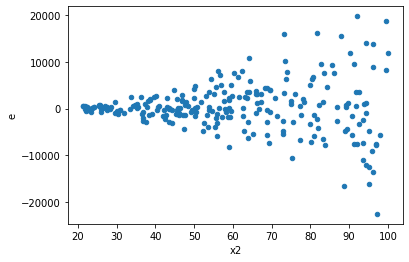

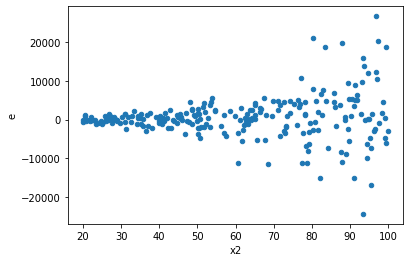

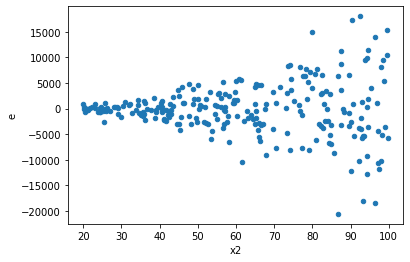

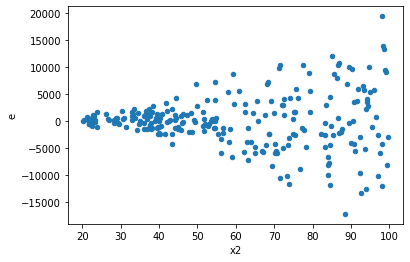

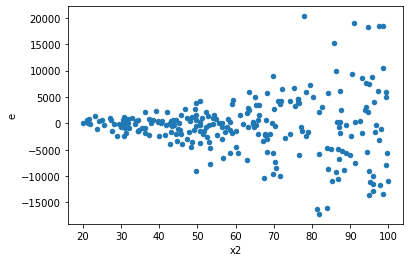

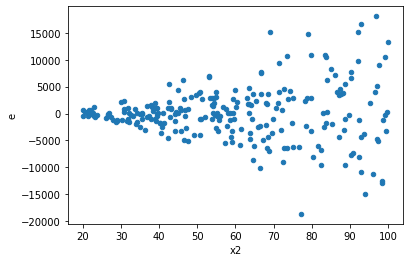

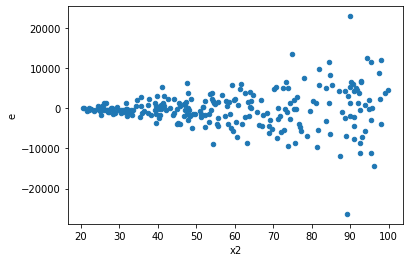

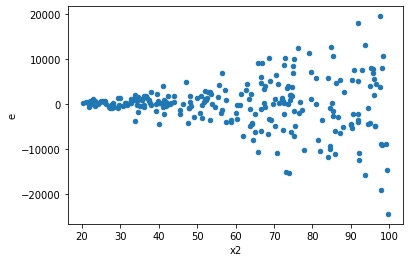

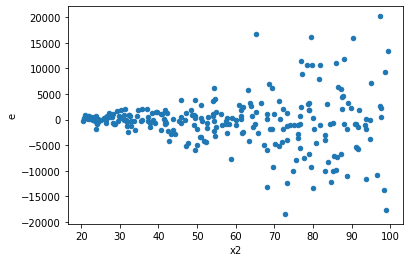

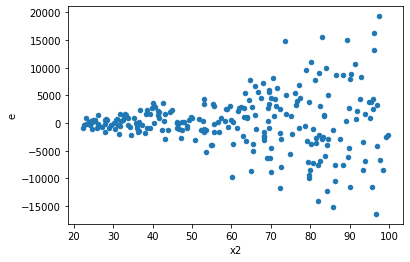

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,221922080.23790663,5394101825.899585,2287856.4972980064,55609297.17422252,24.306287234316468,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,264542144.6691385,4095899245.067492,2727238.6048364793,42225765.41306693,15.482974367619997,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,200286576.0709032,4823137679.89555,2064810.0625866312,49723068.86490258,24.081182945521604,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,151788027.05303642,5046566538.714146,1564825.021165324,52026459.1620015,33.24746119106495,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,299576448.3045219,5168680792.451159,3088416.992830123,53285368.99434184,17.253294849123627,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,161332912.96407482,4068121360.332634,1663225.9068461321,41939395.46734674,25.215693968400064,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,280534045.3175442,5678992184.843067,2892103.5599746825,58546311.18394914,20.243504414641937,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,298270617.33848256,5541331097.926021,3074954.8179225004,57127124.72088681,18.578199714649145,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,288821160.5578097,4197278006.230731,2977537.7377093784,43270907.28072918,14.532446300417847,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,221922080.23790663,5394101825.899585,2287856.4972980064,55609297.17422252,24.306287234316468,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,264542144.6691385,4095899245.067492,2727238.6048364793,42225765.41306693,15.482974367619997,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,200286576.0709032,4823137679.89555,2064810.0625866312,49723068.86490258,24.081182945521604,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,151788027.05303642,5046566538.714146,1564825.021165324,52026459.1620015,33.24746119106495,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,299576448.3045219,5168680792.451159,3088416.992830123,53285368.99434184,17.253294849123627,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,161332912.96407482,4068121360.332634,1663225.9068461321,41939395.46734674,25.215693968400064,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,280534045.3175442,5678992184.843067,2892103.5599746825,58546311.18394914,20.243504414641937,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,298270617.33848256,5541331097.926021,3074954.8179225004,57127124.72088681,18.578199714649145,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,288821160.5578097,4197278006.230731,2977537.7377093784,43270907.28072918,14.532446300417847,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64